In [108]:
import kaleido
import pandas as pd
import numpy as np
import plotly.graph_objects as go
######## Search space #########
import sys
sys.path.append("../")
from search_space.RegNet import RegNet
from search_space.utils import create_widths_plot, scatter_results
# Initialize an empty list to store dictionaries
def results_to_df(path, name):
    data = []
    # Open the text file
    with open(path, 'r') as file:
        lines = file.readlines()
        # Initialize an empty dictionary to store data for each block
        block_data = {}
        for line in lines:
            # If the line contains dashes, it indicates the end of a block
            if '-------------------------' in line:
                # If block_data is not empty, add it to the list of data dictionaries
                if block_data:
                    data.append(block_data)
                    # Reset block_data for the next block
                    block_data = {}
            elif 'best_acc' in line:
                continue
            else:
                # Split the line by ':'
                #print(line)
                key, value = line.strip().split(': ')
                # Store the key-value pair in the block_data dictionary
                block_data[key] = value

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(data)

    # Convert columns to appropriate data types if needed
    df['epoch'] = df['epoch'].astype(int)
    df['lr'] = df['lr'].astype(float)
    df['train_acc'] = df['train_acc'].astype(float)
    df['train_loss'] = df['train_loss'].astype(float)
    df['test_acc'] = df['test_acc'].astype(float)
    df['test_acc_top5'] = df['test_acc_top5'].astype(float)
    df['test_loss'] = df['test_loss'].astype(float)
    df['epoch_time'] = df['epoch_time'].astype(float)
    df=df.assign(name=name)
    
    return df

In [109]:
import json
import os

def get_predictor_data(studies):
    train_data=[]
    for study_folder in studies: 
        data=[]
        #study_folder=f"/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/classifier_train/{study_name}"
        subjects= os.listdir(study_folder)

        subjects=[subject for subject in subjects if os.path.isdir(f"{study_folder}/{subject}")]
        print(subjects)
        for name in subjects:
            try:
                test_acc=results_to_df(f"{study_folder}/{name}/worklog.txt", f"{name}")[["epoch","test_acc","name"]]
                #test_acc=test_acc.rename(columns={"test_acc":"acc","test_loss":"test_acc"})
                #test_acc=test_acc.rename(columns={"test_loss":"test_acc"})
                #print(test_acc.columns)
                #if len(test_acc)>49:
                test_acc_piv = test_acc[["epoch","test_acc","name"]].pivot(index='name', columns='epoch', values='test_acc').add_prefix("epoch_").reset_index()
                #test_acc_piv["best_acc"]=test_acc["acc"].max()
                data.append(test_acc_piv)
            except:
                pass
        data=pd.concat(data)
        train_data.append(data)
    train_data=pd.concat(train_data)
    return train_data

In [110]:
corr_scores={}
accuracies={}
test_accuracies={}
epochs_results={}

In [121]:
import pandas as pd
from itertools import combinations

#train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/16_08_2024_00_41/Gutenberg"]).sort_values("name").set_index("name")
#train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/16_08_2024_11_44/Mateo"]).sort_values("name").set_index("name")
#train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/16_08_2024_13_43/Chester"]).sort_values("name").set_index("name")
#train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/17_08_2024_16_47/Adaline"]).sort_values("name").set_index("name")
train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/17_08_2024_16_21/LaMelo"]).sort_values("name").set_index("name")


['adaptable_jacamar', 'adventurous_wallaby', 'aloof_fulmar', 'ambrosial_leopard', 'amusing_lobster', 'angelic_coati', 'antique_anteater', 'artichoke_shrimp', 'astute_barracuda', 'attentive_nyala', 'auburn_sturgeon', 'authentic_coua', 'benign_guan', 'blue_butterfly', 'bold_bettong', 'brainy_hound', 'brown_bumblebee', 'bulky_whippet', 'camouflaged_kittiwake', 'charming_scorpion', 'colossal_hedgehog', 'convivial_jellyfish', 'cornflower_salamander', 'crafty_hyrax', 'curious_viper', 'curly_emu', 'dangerous_degu', 'demonic_hornet', 'dexterous_raccoon', 'didactic_armadillo', 'discerning_beluga', 'elated_pig', 'elegant_peccary', 'enlightened_impala', 'fat_parakeet', 'fat_walrus', 'fervent_mayfly', 'fluffy_boa', 'fluorescent_antelope', 'foamy_rat', 'fragrant_butterfly', 'fragrant_skylark', 'free_quoll', 'garnet_grasshopper', 'ginger_toucanet', 'gleaming_hawk', 'graceful_echidna', 'great_coyote', 'great_prawn', 'greedy_crocodile', 'icy_reindeer', 'illegal_hornet', 'illustrious_trout', 'imported_

In [123]:
#train_data=train_data.head(len(train_data_dist))

In [122]:
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/16_08_2024_00_44/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/16_08_2024_20_27/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/17_08_2024_14_47/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/18_08_2024_01_01/Adaline"]).sort_values("name").set_index("name")
train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/18_08_2024_19_07/LaMelo"]).sort_values("name").set_index("name")

train_data_dist=train_data_dist.head(len(train_data))

['adaptable_jacamar', 'adventurous_wallaby', 'aloof_fulmar', 'ambrosial_leopard', 'amusing_lobster', 'angelic_coati', 'antique_anteater']


In [113]:
train_data

epoch,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,...,epoch_41,epoch_42,epoch_43,epoch_44,epoch_45,epoch_46,epoch_47,epoch_48,epoch_49,epoch_50
name,,,,,,,,,,,,,,,,,,,,,
adaptable_jacamar,10.00,57.73,70.21,73.62,75.53,78.24,77.94,79.13,81.40,82.15,...,85.97,85.75,85.67,85.66,85.74,85.72,85.68,85.56,85.66,85.66
adventurous_wallaby,10.00,68.11,75.52,76.69,78.86,79.72,81.54,80.83,81.69,80.70,...,85.56,85.96,85.81,86.02,86.06,86.07,86.09,86.13,86.05,86.10
aloof_fulmar,10.00,62.00,70.42,72.34,74.13,77.87,78.50,80.14,80.95,80.45,...,85.08,85.20,84.92,85.19,85.14,85.01,85.01,85.07,85.18,85.01
ambrosial_leopard,10.00,60.54,73.03,73.25,77.63,78.91,79.83,79.00,80.44,80.24,...,85.04,84.87,84.88,85.06,85.01,85.27,85.08,85.23,85.12,85.04
amusing_lobster,10.00,68.20,73.45,76.25,80.95,79.75,79.39,80.87,82.42,83.07,...,86.41,86.34,86.56,86.40,86.40,86.48,86.38,86.38,86.47,86.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loose_bobcat,10.05,60.59,71.20,75.58,78.05,78.66,81.81,80.89,81.41,81.24,...,86.17,86.32,86.09,86.20,86.24,86.31,86.29,86.36,86.32,86.31
magnificent_junglefowl,10.00,66.09,76.98,79.53,79.87,80.81,83.26,82.66,80.72,82.17,...,86.51,86.45,86.43,86.55,86.72,86.62,86.63,86.79,86.77,86.62
merry_lizard,10.00,61.26,72.19,75.69,77.83,79.15,79.85,81.67,81.50,81.96,...,85.36,85.42,85.55,85.51,85.48,85.49,85.62,85.66,85.61,85.60


In [124]:
train_data
#train_data_cum= train_data.iloc[:,:-1].cummin(axis=1)
#train_data_cum["best_acc"]=train_data["best_acc"]

epoch,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,...,epoch_41,epoch_42,epoch_43,epoch_44,epoch_45,epoch_46,epoch_47,epoch_48,epoch_49,epoch_50
name,,,,,,,,,,,,,,,,,,,,,
adaptable_jacamar,10.00,57.73,70.21,73.62,75.53,78.24,77.94,79.13,81.40,82.15,...,85.97,85.75,85.67,85.66,85.74,85.72,85.68,85.56,85.66,85.66
adventurous_wallaby,10.00,68.11,75.52,76.69,78.86,79.72,81.54,80.83,81.69,80.70,...,85.56,85.96,85.81,86.02,86.06,86.07,86.09,86.13,86.05,86.10
aloof_fulmar,10.00,62.00,70.42,72.34,74.13,77.87,78.50,80.14,80.95,80.45,...,85.08,85.20,84.92,85.19,85.14,85.01,85.01,85.07,85.18,85.01
ambrosial_leopard,10.00,60.54,73.03,73.25,77.63,78.91,79.83,79.00,80.44,80.24,...,85.04,84.87,84.88,85.06,85.01,85.27,85.08,85.23,85.12,85.04
amusing_lobster,10.00,68.20,73.45,76.25,80.95,79.75,79.39,80.87,82.42,83.07,...,86.41,86.34,86.56,86.40,86.40,86.48,86.38,86.38,86.47,86.34
angelic_coati,10.81,55.10,70.81,73.67,74.60,79.85,77.46,78.17,58.08,79.03,...,84.44,84.39,84.83,84.93,85.24,84.78,84.93,84.85,85.00,84.90
antique_anteater,10.00,65.16,74.21,77.48,77.78,79.35,80.08,80.84,81.72,80.70,...,85.43,85.52,85.19,85.41,85.36,85.44,85.52,85.43,85.44,85.47


In [125]:
train_data_cum= train_data.cummax(axis=1)
train_data_cum["best_acc"]=train_data_cum.max(axis=1)
train_data["best_acc"]=train_data.max(axis=1)

train_data_dist_cum= train_data_dist.cummax(axis=1)
train_data_dist_cum["best_acc"]=train_data_dist_cum.max(axis=1)
train_data_dist["best_acc"]=train_data_dist.max(axis=1)

In [126]:
#train_data_cum= train_data.cummin(axis=1)
#train_data_cum["best_acc"]=train_data_cum.min(axis=1)
#train_data["best_acc"]=train_data.min(axis=1)

#train_data_dist_cum= train_data_dist.cummin(axis=1)
#train_data_dist_cum["best_acc"]=train_data_dist_cum.min(axis=1)
#train_data_dist["best_acc"]=train_data_dist.min(axis=1)

In [127]:
train_data.sort_values("best_acc",ascending=False)

epoch,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,...,epoch_42,epoch_43,epoch_44,epoch_45,epoch_46,epoch_47,epoch_48,epoch_49,epoch_50,best_acc
name,,,,,,,,,,,,,,,,,,,,,
amusing_lobster,10.00,68.20,73.45,76.25,80.95,79.75,79.39,80.87,82.42,83.07,...,86.34,86.56,86.40,86.40,86.48,86.38,86.38,86.47,86.34,86.56
adventurous_wallaby,10.00,68.11,75.52,76.69,78.86,79.72,81.54,80.83,81.69,80.70,...,85.96,85.81,86.02,86.06,86.07,86.09,86.13,86.05,86.10,86.13
adaptable_jacamar,10.00,57.73,70.21,73.62,75.53,78.24,77.94,79.13,81.40,82.15,...,85.75,85.67,85.66,85.74,85.72,85.68,85.56,85.66,85.66,85.97
aloof_fulmar,10.00,62.00,70.42,72.34,74.13,77.87,78.50,80.14,80.95,80.45,...,85.20,84.92,85.19,85.14,85.01,85.01,85.07,85.18,85.01,85.58
antique_anteater,10.00,65.16,74.21,77.48,77.78,79.35,80.08,80.84,81.72,80.70,...,85.52,85.19,85.41,85.36,85.44,85.52,85.43,85.44,85.47,85.53
ambrosial_leopard,10.00,60.54,73.03,73.25,77.63,78.91,79.83,79.00,80.44,80.24,...,84.87,84.88,85.06,85.01,85.27,85.08,85.23,85.12,85.04,85.27
angelic_coati,10.81,55.10,70.81,73.67,74.60,79.85,77.46,78.17,58.08,79.03,...,84.39,84.83,84.93,85.24,84.78,84.93,84.85,85.00,84.90,85.24


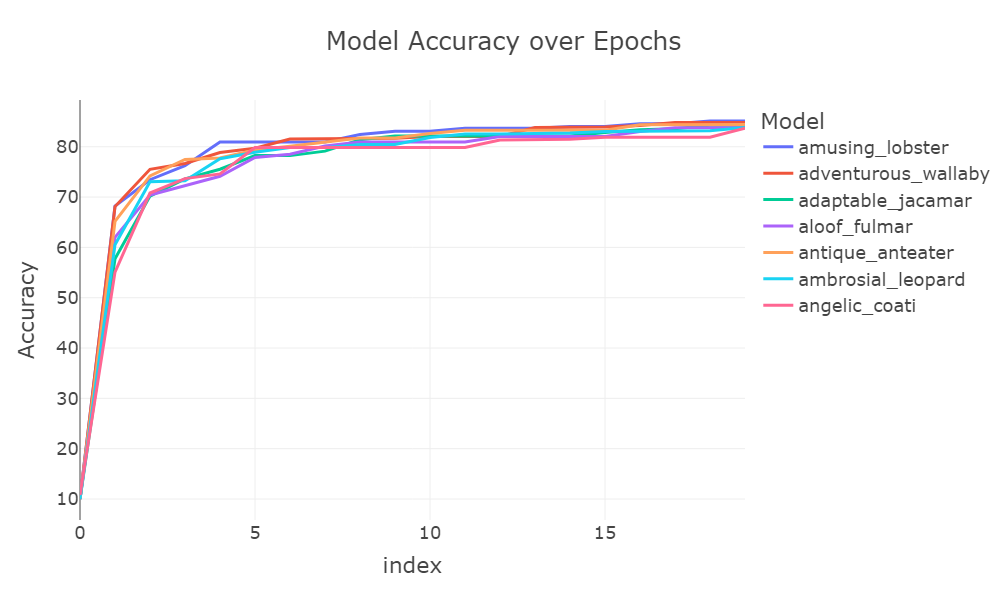

In [128]:
epochs_data=train_data_cum.sort_values("best_acc",ascending= False).iloc[:,:20].T.reset_index(drop=True).reset_index().melt(id_vars='index', var_name='Model', value_name='Accuracy')

import plotly.express as px
fig = px.line(epochs_data, x='index', y='Accuracy', color='Model', title='Model Accuracy over Epochs')
fig.update_layout(height=600, width=800, template="presentation")
fig

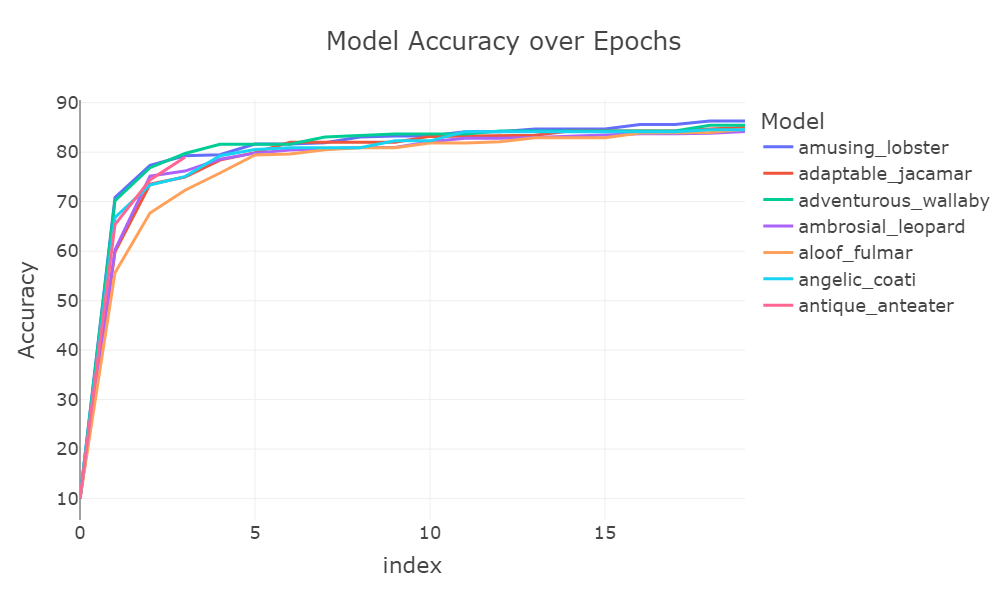

In [129]:
epochs_data=train_data_dist_cum.sort_values("best_acc",ascending= False).iloc[:,:20].T.reset_index(drop=True).reset_index().melt(id_vars='index', var_name='Model', value_name='Accuracy')

import plotly.express as px
fig = px.line(epochs_data, x='index', y='Accuracy', color='Model', title='Model Accuracy over Epochs')
fig.update_layout(height=600, width=800, template="presentation")
fig

In [130]:
train_data_cum=train_data_cum.reset_index()
train_data=train_data.reset_index()

train_data_dist_cum=train_data_dist_cum.reset_index()
train_data_dist=train_data_dist.reset_index()


In [131]:
total_data=[]


pairs = list(combinations(train_data_cum.index, 2))
combined_data = []

for idx1, idx2 in pairs:
    row1 = train_data_cum.loc[idx1]
    row2 = train_data_cum.loc[idx2]
    

    combined_row = {
        'name_A': row1['name'],
        'name_B': row2['name'],
        'best_acc_A': row1['best_acc'],
        'best_acc_B': row2['best_acc'],
        'label': 1 if row1['best_acc'] > row2['best_acc'] else 0
        
    }
    # Create the epochs_row dictionary
    epochs_rows = {
        f'epoch_{epoch}_A': row1[f'epoch_{epoch}'] for epoch in range(0, 51)
    }
    epochs_rows.update({
        f'epoch_{epoch}_B': row2[f'epoch_{epoch}'] for epoch in range(0, 51)
    })
    ##############################################################
    row1_dist=train_data_dist_cum.loc[idx1]
    row2_dist=train_data_dist_cum.loc[idx2]
    dist_rows= {
        f'dist_{epoch}_A': row1_dist[f'epoch_{epoch}'] for epoch in range(0, 21)
    }
    dist_rows.update({
        f'dist_{epoch}_B': row2_dist[f'epoch_{epoch}'] for epoch in range(0, 21)
    })
    combined_row.update(dist_rows)
    #######################
    
    # Update combined_row with epochs_rows
    combined_row.update(epochs_rows)

    combined_data.append(combined_row)

combined_df = pd.DataFrame(combined_data)



In [132]:
X_test_new=combined_df.drop(columns=['label'])
y_test_new=combined_df["label"]

In [133]:
epoch=5
X_test_new[["name_A","name_B","best_acc_A","best_acc_B",f"dist_{epoch}_A",f"dist_{epoch}_B",f"epoch_{epoch}_A",f"epoch_{epoch}_B"]]

,name_A,name_B,best_acc_A,best_acc_B,dist_5_A,dist_5_B,epoch_5_A,epoch_5_B
0,adaptable_jacamar,adventurous_wallaby,85.97,86.13,79.91,81.61,78.24,79.72
1,adaptable_jacamar,aloof_fulmar,85.97,85.58,79.91,79.44,78.24,77.87
2,adaptable_jacamar,ambrosial_leopard,85.97,85.27,79.91,79.81,78.24,78.91
3,adaptable_jacamar,amusing_lobster,85.97,86.56,79.91,81.65,78.24,80.95
4,adaptable_jacamar,angelic_coati,85.97,85.24,79.91,80.55,78.24,79.85
5,adaptable_jacamar,antique_anteater,85.97,85.53,79.91,NaN,78.24,79.35
6,adventurous_wallaby,aloof_fulmar,86.13,85.58,81.61,79.44,79.72,77.87
7,adventurous_wallaby,ambrosial_leopard,86.13,85.27,81.61,79.81,79.72,78.91
8,adventurous_wallaby,amusing_lobster,86.13,86.56,81.61,81.65,79.72,80.95
9,adventurous_wallaby,angelic_coati,86.13,85.24,81.61,80.55,79.72,79.85


In [141]:
epoch=10

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_0=np.repeat(0,len(y_test_new))
y_0= (X_test_new[f'epoch_{epoch}_A'] > X_test_new[f'epoch_{epoch}_B']).astype(int).values
# Calculate accuracy
y_0_accuracy = accuracy_score(y_test_new, y_0)
print(f"Accuracy: {y_0_accuracy}")

Accuracy: 0.7619047619047619


In [142]:
y_0=np.repeat(0,len(y_test_new))
y_0= (X_test_new[f'dist_{epoch}_A'] > X_test_new[f'dist_{epoch}_B']).astype(int).values
# Calculate accuracy
y_0_accuracy = accuracy_score(y_test_new, y_0)
print(f"Accuracy: {y_0_accuracy}")

Accuracy: 0.6190476190476191


In [143]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau

def kendall_tau_distance(list1, list2):
    tau, _ = kendalltau(list1, list2)
    return tau
def spearman_rank_correlation(list1, list2):
    corr, _ = spearmanr(list1, list2)
    return corr
def get_correlations_epochs(combined_df):  
    accs={}
    accs_slope={}
    corrs={}
    corrs_slope={}
    results={}
    X_test_new=combined_df
    y_test_new=combined_df["label"]
    for epoch in range(1,51):
        #############################
        if epoch<=20:
            y_pred_slope= (X_test_new[f'dist_{epoch}_A'] > X_test_new[f'dist_{epoch}_B']).astype(int).values        
        else:
            y_pred_slope= (X_test_new[f'epoch_{epoch}_A'] >= X_test_new[f'epoch_{epoch}_B']).astype(int).values
        
        accuracy_slope = accuracy_score(y_test_new, y_pred_slope)
        accs_slope[epoch]=accuracy_slope
        ############################
        y_epoch_10_pred= (X_test_new[f'epoch_{epoch}_A'] >= X_test_new[f'epoch_{epoch}_B']).astype(int).values

        accuracy = accuracy_score(y_test_new, y_epoch_10_pred)
        accs[epoch]=accuracy
        
        ranking_test_df=X_test_new[["name_A","name_B", "label"]]
        ranking_test_df["pred_10_epochs"]=y_epoch_10_pred
        #####################
        ranking_test_df["pred_slope"]=y_pred_slope
        ################################
        # Create a new column by applying the function to each row
        ranking_target={}
        ranking_10={}
        ranking_slope={}
        
        for ind in list(ranking_test_df.name_A.unique())+list(ranking_test_df.name_B.unique()):
            ranking_target[ind]=0
            ranking_10[ind]=0
            ranking_slope[ind]=0
            
        for index, row in ranking_test_df.iterrows():
            if row["label"]==1:
                ranking_target[row["name_A"]]=ranking_target[row["name_A"]]+1
            else:
                ranking_target[row["name_B"]]=ranking_target[row["name_B"]]+1

            if row["pred_10_epochs"]==1:
                ranking_10[row["name_A"]]=ranking_10[row["name_A"]]+1
            else:
                ranking_10[row["name_B"]]=ranking_10[row["name_B"]]+1

            if row["pred_slope"]==1:
                ranking_slope[row["name_A"]]=ranking_slope[row["name_A"]]+1
            else:
                ranking_slope[row["name_B"]]=ranking_slope[row["name_B"]]+1

        ranking_target_df=pd.DataFrame([ranking_target]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)
        ranking_10_df=pd.DataFrame([ranking_10]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)

        ranking_slope_df=pd.DataFrame([ranking_slope]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)

            
        ######## Correlation #########
        # Example usage
        target =ranking_target_df.index.tolist()
        list_to_compare_10 = ranking_10_df.index.tolist()
        # Convert the lists to ranks
        target_ranks = {k: i for i, k in enumerate(target)}
        list_to_compare_ranks_10 = [target_ranks[x] for x in list_to_compare_10]
        
        #####################################
        list_to_compare_slope = ranking_slope_df.index.tolist()
        list_to_compare_ranks_slope = [target_ranks[x] for x in list_to_compare_slope]
        spearman_corr_slope = spearman_rank_correlation(list_to_compare_ranks_slope, list(range(len(target))))
        corrs_slope[epoch]=spearman_corr_slope
        
        # Calculate Spearman rank correlation
        spearman_corr_10 = spearman_rank_correlation(list_to_compare_ranks_10, list(range(len(target))))
        print(f'Spearman rank correlation: {spearman_corr_10}')
        # Calculate Kendall Tau distance
        tau_distance_10 = kendall_tau_distance(list_to_compare_ranks_10, list(range(len(target))))
        print(f'Kendall Tau distance: {tau_distance_10}')
        corrs[epoch]=spearman_corr_10

    
    results["accuracy"]=accs
    results["correlation"]=corrs
    results["accuracy_slope"]=accs_slope
    results["correlation_slope"]=corrs_slope
    return results


In [144]:
corr_epochs=get_correlations_epochs(combined_df)

/tmp/ipykernel_411822/787800708.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_411822/787800708.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_411822/787800708.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykerne

Spearman rank correlation: 0.7500000000000002
Kendall Tau distance: 0.6190476190476191
Spearman rank correlation: 0.25
Kendall Tau distance: 0.14285714285714288
Spearman rank correlation: 0.25
Kendall Tau distance: 0.14285714285714288
Spearman rank correlation: 0.6071428571428572
Kendall Tau distance: 0.5238095238095238
Spearman rank correlation: 0.1785714285714286
Kendall Tau distance: 0.14285714285714288
Spearman rank correlation: 0.3571428571428572
Kendall Tau distance: 0.14285714285714288
Spearman rank correlation: 0.5357142857142858
Kendall Tau distance: 0.33333333333333337
Spearman rank correlation: 0.7857142857142859
Kendall Tau distance: 0.7142857142857143
Spearman rank correlation: 0.8214285714285715
Kendall Tau distance: 0.7142857142857143
Spearman rank correlation: 0.6785714285714287
Kendall Tau distance: 0.5238095238095238
Spearman rank correlation: 0.42857142857142866
Kendall Tau distance: 0.33333333333333337
Spearman rank correlation: 0.42857142857142866
Kendall Tau dista

/tmp/ipykernel_411822/787800708.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_411822/787800708.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_411822/787800708.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykerne

Spearman rank correlation: 0.8928571428571429
Kendall Tau distance: 0.8095238095238096
Spearman rank correlation: 0.8214285714285715
Kendall Tau distance: 0.7142857142857143
Spearman rank correlation: 0.8214285714285715
Kendall Tau distance: 0.7142857142857143
Spearman rank correlation: 0.7142857142857144
Kendall Tau distance: 0.6190476190476191
Spearman rank correlation: 0.7142857142857144
Kendall Tau distance: 0.6190476190476191
Spearman rank correlation: 0.7142857142857144
Kendall Tau distance: 0.6190476190476191
Spearman rank correlation: 0.7500000000000002
Kendall Tau distance: 0.6190476190476191
Spearman rank correlation: 0.7500000000000002
Kendall Tau distance: 0.6190476190476191
Spearman rank correlation: 0.8928571428571429
Kendall Tau distance: 0.8095238095238096
Spearman rank correlation: 0.8928571428571429
Kendall Tau distance: 0.8095238095238096
Spearman rank correlation: 0.6785714285714287
Kendall Tau distance: 0.5238095238095238
Spearman rank correlation: 0.82142857142857

/tmp/ipykernel_411822/787800708.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_411822/787800708.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_411822/787800708.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykerne

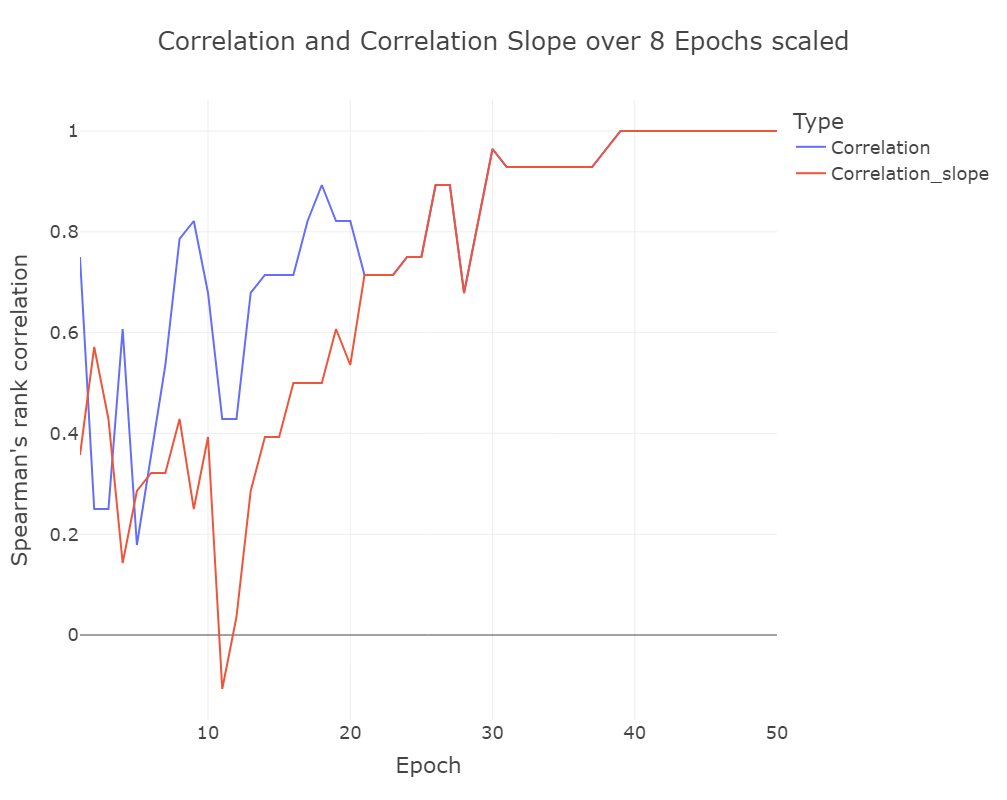

In [145]:
df = pd.DataFrame(list(corr_epochs["correlation"].items()), columns=['Epoch', 'Correlation'])
df_slope = pd.DataFrame(list(corr_epochs["correlation_slope"].items()), columns=['Epoch', 'Correlation_slope'])
df=pd.merge(df, df_slope, on="Epoch")
# Create the line plot using Plotly
df_melted = df.melt(id_vars='Epoch', value_vars=['Correlation', 'Correlation_slope'], 
                    var_name='Type', value_name='Value')

# Plot the data
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Correlation and Correlation Slope over 8 Epochs scaled')
fig.update_traces(line=dict(width=2)) 
fig.update_layout(width=1000, height=800, template="presentation",
                 yaxis_title="Spearman's rank correlation")
fig

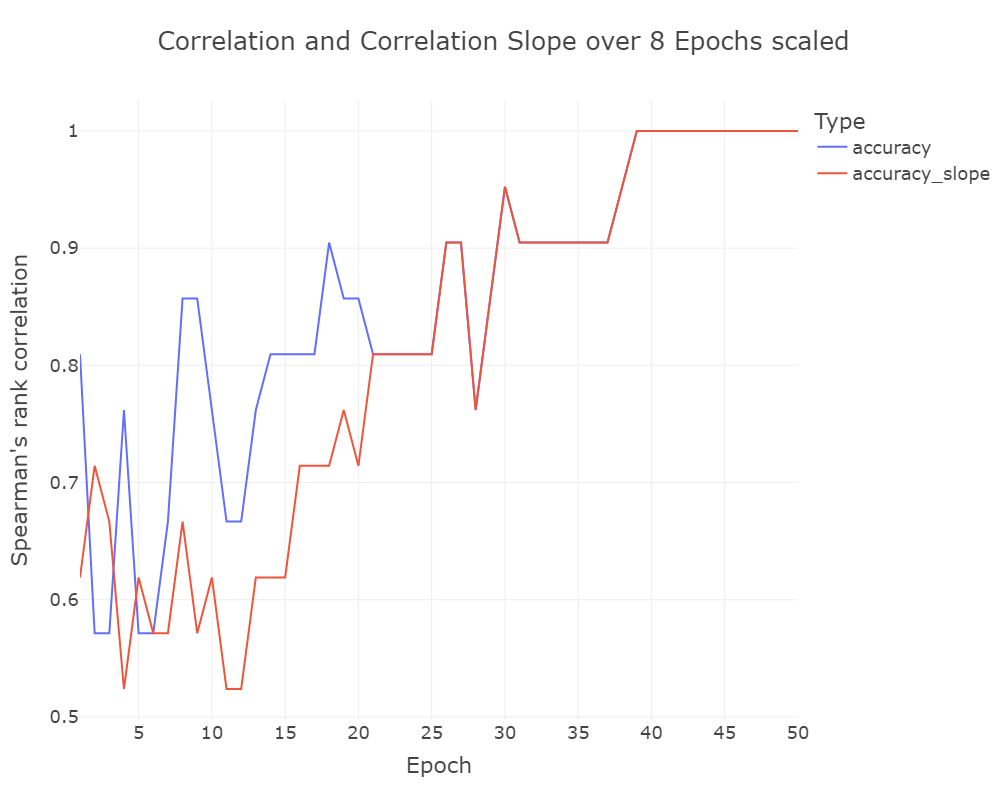

In [146]:
df = pd.DataFrame(list(corr_epochs["accuracy"].items()), columns=['Epoch', 'accuracy'])
df_slope = pd.DataFrame(list(corr_epochs["accuracy_slope"].items()), columns=['Epoch', 'accuracy_slope'])
df=pd.merge(df, df_slope, on="Epoch")
# Create the line plot using Plotly
df_melted = df.melt(id_vars='Epoch', value_vars=['accuracy', 'accuracy_slope'], 
                    var_name='Type', value_name='Value')

# Plot the data
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Correlation and Correlation Slope over 8 Epochs scaled')
fig.update_traces(line=dict(width=2)) 
fig.update_layout(width=1000, height=800, template="presentation",
                 yaxis_title="Spearman's rank correlation")
fig